<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#purpose" data-toc-modified-id="purpose-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>purpose</a></span></li><li><span><a href="#model-of-analysis" data-toc-modified-id="model-of-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>model of analysis</a></span><ul class="toc-item"><li><span><a href="#default-parameter-values-(time-unit-=-day)" data-toc-modified-id="default-parameter-values-(time-unit-=-day)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>default parameter values (time unit = day)</a></span></li><li><span><a href="#ODE-system-for-analytical-solve" data-toc-modified-id="ODE-system-for-analytical-solve-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ODE system for analytical solve</a></span></li><li><span><a href="#ODE-system-for-numerical-solve" data-toc-modified-id="ODE-system-for-numerical-solve-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ODE system for numerical solve</a></span></li><li><span><a href="#temperature-standardization" data-toc-modified-id="temperature-standardization-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>temperature standardization</a></span></li><li><span><a href="#possibility-of-replacing-analytical-with-numerical-model-decipher-method" data-toc-modified-id="possibility-of-replacing-analytical-with-numerical-model-decipher-method-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>possibility of replacing analytical with numerical model decipher method</a></span></li></ul></li><li><span><a href="#numerical-model-in-action" data-toc-modified-id="numerical-model-in-action-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>numerical model in action</a></span></li><li><span><a href="#result-analysis-env" data-toc-modified-id="result-analysis-env-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>result analysis env</a></span></li><li><span><a href="#links-to-result-plots" data-toc-modified-id="links-to-result-plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>links to result plots</a></span></li></ul></div>

# purpose
This is a navigator notebook just for explanation and links to separate result demonstration notebooks

In [1]:
using RCall, PyCall, DataFrames, CSV, Plots, SymPy, Random
sc = pyimport("scipy")
cst = pyimport("scipy.constants")
itg = pyimport("scipy.integrate")
sympy.init_printing()
println()

# model of analysis
CPB open system
\begin{equation*}\left\{\begin{array}{rl}
C'(t) &= (1-\varepsilon_P)\varepsilon_{PR}g_PP +a_PP^2 +g_BCB(e_{BR}(1-e_B)-1) +m_BB -xC\\
P'(t) &= \varepsilon_{PR}\varepsilon_Pg_PP -a_PP^2\\
B'(t) &= \varepsilon_{BR}\varepsilon_{B}g_BCB -m_BB
\end{array}\right.\end{equation*}

key:
- orgC -- organic carbon in any form
- orgP -- biomass carbon in photocell
- orgB -- biomass carbon in bacterial decomposer
- [P] -- photocell
- [B] -- bacterial decomposer

notation | unit | meaning
--- | --- | ---
C'(t) | $\dfrac{gC}{m^3t}$ | rate of change of density of orgC
P'(t) | $\dfrac{gC}{m^3t}$ | rate of change of density of orgP
B'(t) | $\dfrac{gC}{m^3t}$ | rate of change of density of orgB
C | $\dfrac{gC}{m^3}$ | density of orgC
P | $\dfrac{gC}{m^3}$ | density of orgP
B | $\dfrac{gC}{m^3}$ | density of orgB
$e_{PR}$ | no | fraction of not respired carbon by [P]
$e_P$ | no | fraction of carbon incorporated into [P] biomass
$g_P$ | $t^{-1}$ | apparent growth rate of [P]
$a_P$ | $\dfrac{m^3}{gC t}$ | rate of [P] intraspecific interference per unit density
$e_{BR}$ | no | fraction of not respired carbon by [B]
$e_B$ | no | fraction of carbon incorporated into [B] biomass
$g_B$ | $\dfrac{m^3}{gC t}$ | apparent growth rate of [B] per unit density
$m_B$ | $t^{-1}$ | apparent death rate of [B]
$x$ | $t^{-1}$ | rate of orgC removal

## default parameter values (time unit = day)

parameter | value | temperature ($^o$C) | source
--- | --- | --- | ---
$e_{PR}$ | 0.875 | 23 | [calculation](https://github.com/ph-u/Project/blob/master/code/respEff.R) from [p.4](https://nph.onlinelibrary.wiley.com/doi/pdf/10.1111/j.1469-8137.1989.tb00321.x)
$e_P$ | 0.63 | 25 | [p.9](https://nph.onlinelibrary.wiley.com/doi/pdf/10.1111/j.1469-8137.1989.tb00321.x) & [p.1](https://www.microbiologyresearch.org/docserver/fulltext/micro/18/1/mic-18-1-107.pdf?expires=1584642853&id=id&accname=guest&checksum=957705A303FE5CD681D28815867C2EB9)
$g_P$ | no info | 23-27 | standardization: BioTrait data
$a_P$ | no info | 23-27 | wild scan, max value at [p.4](https://www.sciencedirect.com/science/article/pii/S0168165607000892)
$e_{BR}$ | 0.98 | 23 | calculation from [p.3](https://reader.elsevier.com/reader/sd/pii/0038071788900065?token=34DAAECCA836C528992605A0EAF200D234985CC7A2179F24E7D451AC781FE695F8B9CDA79D353C8FC9C097848F6569A0)
$e_B$ | 0.55 | 23 | [p.1](https://reader.elsevier.com/reader/sd/pii/0038071788900065?token=34DAAECCA836C528992605A0EAF200D234985CC7A2179F24E7D451AC781FE695F8B9CDA79D353C8FC9C097848F6569A0)
$g_B$ | no info | 23-27 | standardization: BioTrait data
$m_B$ | 0.139 | 23 | [p.1](https://reader.elsevier.com/reader/sd/pii/0038071788900065?token=34DAAECCA836C528992605A0EAF200D234985CC7A2179F24E7D451AC781FE695F8B9CDA79D353C8FC9C097848F6569A0)

## ODE system for analytical solve

In [2]:
function ebc7(Den,t,x, g_P,e_PR,e_P,a_P, g_B,e_BR,e_B,m_B)
    
    ## variable sorting
    C = Den[:1]
    P = Den[:2]
    B = Den[:3]
    
    ## rate calculation
    dC = g_P*e_PR*(1-e_P)*P +a_P*P^2 +g_B*(e_BR*(1-e_B)-1)*C*B +m_B*B -x*C
    dP = g_P*e_PR*e_P*P -a_P*P^2
    dB = g_B*e_BR*e_B*C*B -m_B*B
    
    ## logic check
    if C<=0; dC=0;end
    if P<=0; dP=0;end
    if B<=0; dB=0;end
    
    return(sc.array([dC,dP,dB]))
    
end

ebc7 (generic function with 1 method)

In [3]:
## default settings
tStp = 20
t = sc.linspace(0, 1000, tStp) # sample time series
ini = [1 1 1] # gC/m3 C, P, B

## parameters (day^{-1})
x = 0 # larger value, lower eqm org-B pool
e_PR = .875 # larger value, increase in org-C < photocell < detritivore
e_P = .63 # larger value, increase in org-C < photocell < detritivore
g_P = .89 # larger value, larger eqm position of C-pools and differences between C-pools eqm values
a_P = .3 # opposite to the g_P effect
e_BR = .6 # larger value, lower org-C and higher detritivore
e_B = .55 # larger value, smaller detritivore and larger org-C
g_B = .8 # larger value, lower eqm org-C pool
m_B = .1 # smaller value, larger differences between C-pools eqm values; larger effect on detritivore

println()

┌ Info: Saved animation to 
│   fn = /home/xxxxxx/Project/sandbox/gif/randStart.gif
└ @ Plots /home/xxxxxx/.julia/packages/Plots/XpHkc/src/animation.jl:98


Plots.AnimatedGif("/home/xxxxxx/Project/sandbox/gif/randStart.gif")
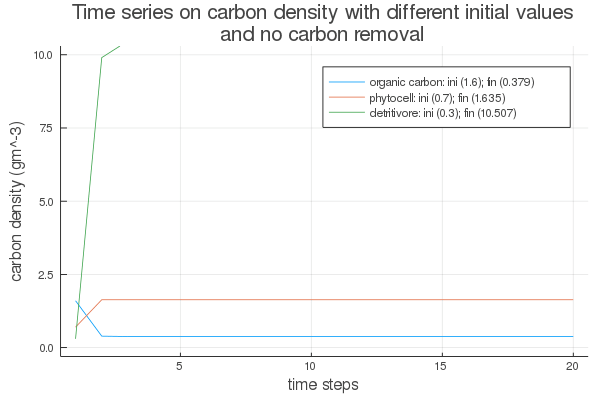

In [4]:
aa = @animate for i in 1:100
    pops = abs.(rand(Int8,3)/10)
    pops, infodict = itg.odeint(ebc7, pops, t, full_output=true, args=(x, g_P,e_PR,e_P,a_P, g_B,e_BR,e_B,m_B))
    plot(pops, xlabel="time steps", ylabel="carbon density (gm^-3)", title="Time series on carbon density with different initial values\nand no carbon removal",
        lab=["organic carbon: ini ("*string(round(pops[1,1]; digits=3))*"); fin ("*string(round(pops[tStp,1]; digits=3))*")" "phytocell: ini ("*string(round(pops[1,2]; digits=3))*"); fin ("*string(round(pops[tStp,2]; digits=3))*")" "detritivore: ini ("*string(round(pops[1,3]; digits=3))*"); fin ("*string(round(pops[tStp,3]; digits=3))*")"
            ], ylim=[0,10])
end
gif(aa, "gif/randStart.gif", fps=10)

## ODE system for numerical solve

In [5]:
@vars C P B
x, e_PR,e_P,g_P,a_P, e_BR,e_B,g_B,m_B = symbols("x e_PR e_P g_P a_P e_BR e_B g_B m_B",positive=true)

dC = g_P*e_PR*(1-e_P)*P +a_P*P^2 +g_B*(e_BR*(1-e_B)-1)*C*B +m_B*B -x*C
dP = g_P*e_PR*e_P*P -a_P*P^2
dB = g_B*e_BR*e_B*C*B -m_B*B

B⋅C⋅e_B⋅e_BR⋅g_B - B⋅m_B

In [6]:
ss = solve([Eq(dC,0),Eq(dP,0),Eq(dB,0)],[C,P,B])
ss

4-element Array{Tuple{Sym,Sym,Sym},1}:
 (0, 0, 0)                                                                                                           
 (m_B/(e_B*e_BR*g_B), 0, x/(e_BR*g_B - g_B))                                                                         
 (m_B/(e_B*e_BR*g_B), e_P*e_PR*g_P/a_P, (a_P*m_B*x - e_B*e_BR*e_P*e_PR^2*g_B*g_P^2)/(a_P*e_BR*g_B*m_B - a_P*g_B*m_B))
 (e_P*e_PR^2*g_P^2/(a_P*x), e_P*e_PR*g_P/a_P, 0)                                                                     

In [7]:
[ss[3][1],ss[3][2],ss[3][3]]

3-element Array{Sym,1}:
                                                           m_B/(e_B*e_BR*g_B)
                                                             e_P*e_PR*g_P/a_P
 (a_P*m_B*x - e_B*e_BR*e_P*e_PR^2*g_B*g_P^2)/(a_P*e_BR*g_B*m_B - a_P*g_B*m_B)

When substitute the above co-existing solution with pre-defined parameter value

In [8]:
x = 0
e_PR = .875; e_P = .63; g_P = .89; a_P = .3
e_BR = .6; e_B = .55; g_B = .8; m_B = .1

[m_B/(e_B*e_BR*g_B), e_P*e_PR*g_P/a_P, (a_P*m_B*x - e_B*e_BR*e_P*e_PR^2*g_B*g_P^2)/(a_P*e_BR*g_B*m_B - a_P*g_B*m_B)]

3-element Array{Float64,1}:
  0.3787878787878788
  1.635375          
 10.506773320312503 

## temperature standardization

Apparent growth rate as a function from Arrhenius Equation
\begin{equation*}A = A_0e^{\dfrac{-E_A}{k(T_C+273.15)}}\end{equation*}

notation | unit | meaning
--- | --- | ---
$A$ | $t^{-1}$ | apparent rate
$A_0$ | $t^{-1}$ | standardization value
$E_A$ | eV | activation energy
$k$ | eVK$^{-1}$ | Boltzmann constant
$T_C$ | $^o$C | temperature in degree Celsius

$E_A$ standard values (eV, from [p.3](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2010GB003907)) -- [P]: __0.32__ ; [B]: __0.66__

## possibility of replacing analytical with numerical model decipher method
It is determined that numerical analysis can replace analytical alternative because of the stability of the analytical analysis and the production of alternative equilibria in the numerical solve.  This showed the possibility of having alternative end-points if different parameter values were used prior the model-testing phase.

# numerical model in action
- temperature-standardized growth rate values were calculated from BioTrait [data](https://github.com/mhasoba/TheMulQuaBio/blob/master/data/BioTraits.csv) using [this](https://github.com/ph-u/Project/blob/master/code/rateDet.R) R script
- CPB model was scripted in Julia-lang and can be accessed [here](https://github.com/ph-u/Project/blob/master/code/maxYield.jl)

# result analysis env
python pkg for parameter simulation: scipy (1.4.1), numpy (1.18.2)  
Julia-lang check pkg version: using Pkg;Pkg.installed()  
RCall (0.13.4), DataFrames (0.20.2), CSV (0.6.1), Plots (0.29.7)  

In [9]:
#rAw = CSV.read("../result/maxYield_0.1.csv")
rAw = CSV.read("../result/maxYield_0.05.csv")
describe(rAw)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Nothing,Nothing,DataType
1,x,0.492781,0.0,0.49,1.0,,,Float64
2,e_PR,0.875,0.875,0.875,0.875,,,Float64
3,e_P,0.63,0.63,0.63,0.63,,,Float64
4,g_P,0.410162,0.259,0.4075,0.556,,,Float64
5,a_P,0.197197,0.001,0.2004,0.4,,,Float64
6,e_BR,0.6,0.6,0.6,0.6,,,Float64
7,e_B,0.55,0.55,0.55,0.55,,,Float64
8,g_B,4.80709,1.046,4.855,8.414,,,Float64
9,m_B,0.14,0.14,0.14,0.14,,,Float64


# links to result plots
- [organic carbon](https://nbviewer.jupyter.org/github/ph-u/Project/blob/master/sandbox/cpb_orgC.ipynb)
- [photocell](https://nbviewer.jupyter.org/github/ph-u/Project/blob/master/sandbox/cpb_orgP.ipynb)
- [bacterial decomposer](https://nbviewer.jupyter.org/github/ph-u/Project/blob/master/sandbox/cpb_orgB.ipynb)
- [total carbon](https://nbviewer.jupyter.org/github/ph-u/Project/blob/master/sandbox/cpb_orgA.ipynb)